In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
trees = [ Tree(sample) for sample in [fc.sr.QCD_B_List + [fc.sr.TTJets],fc.sr.NMSSM_MX_700_MY_400] ]

In [14]:
get_scaled_cutflow = lambda tree : np.array([cutflow*scale for cutflow,scale in zip(tree.cutflow,tree.scales)])

In [15]:
all_study = Study(trees)
all_scaled_cutflows = [ get_scaled_cutflow(tree) for tree in all_study.selections ]

In [16]:
x = range(len(trees[0].cutflow_labels))

In [8]:
bkg_tree = Tree(fc.sr.QCD_B_List + [fc.sr.TTJets])

In [20]:
bkgd_study = Study(bkg_tree)
scaled_cutflows = [ get_scaled_cutflow(tree) for tree in bkgd_study.selections ]

In [9]:
sig_tree = Tree(fc.sr.NMSSM_MX_700_MY_400)

In [18]:
sig_study = Study(sig_tree)
sig_scaled_cutflows = [ get_scaled_cutflow(tree) for tree in sig_study.selections ]

In [19]:
import matplotlib.pyplot as plt

In [22]:
lumi = 59740

In [30]:
len(scaled_cutflows[0]*lumi)

15

(100000, 1000000)

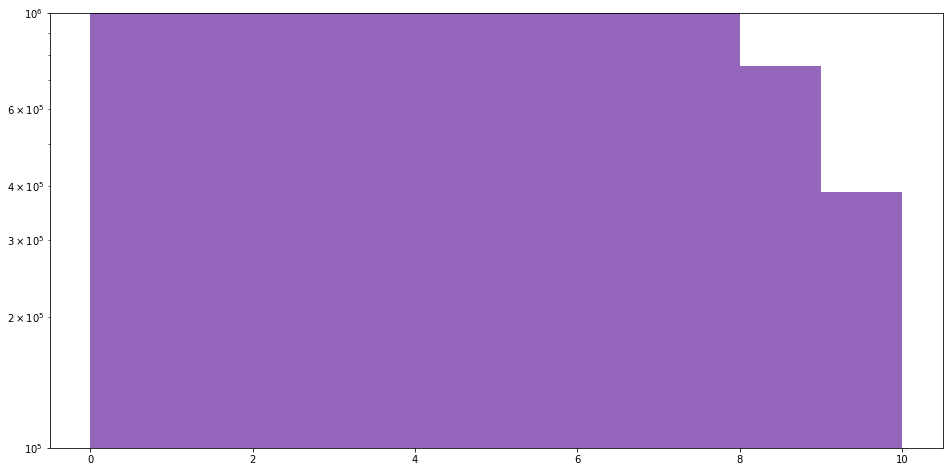

In [66]:
fig, ax = plt.subplots(figsize=(16,8))
n = 0
for cutflow in scaled_cutflows[0]*lumi:
    n_i, b, im = ax.hist(x, weights=cutflow, stacked=True)
    n += n_i
# plt.hist(x, weights=sig_scaled_cutflows[0][0], stacked=True)
ax.set_yscale('log')
ax.set_ylim(10**5, 10**6)

In [31]:
n[0]

14536579972.787998

In [45]:
n

array([1.45365800e+10, 1.26890434e+07, 9.88488197e+06, 7.69693116e+06,
       7.66151479e+06, 5.80457905e+06, 5.80457905e+06, 4.70307672e+06,
       2.94819537e+06, 1.57486887e+06])

[ 2342.30109504 81042.48553411 54124.8819788  22191.72474075
  6071.82817838   654.93472885   119.15968762   355.65277752
 20952.84459411 22330.68103515 12975.02903384  4239.7143315
   643.81071617   173.64966186 62678.66899767]
290897.3670913554
[ 0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1
  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3
  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5
  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7
  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9
 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0
  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10]


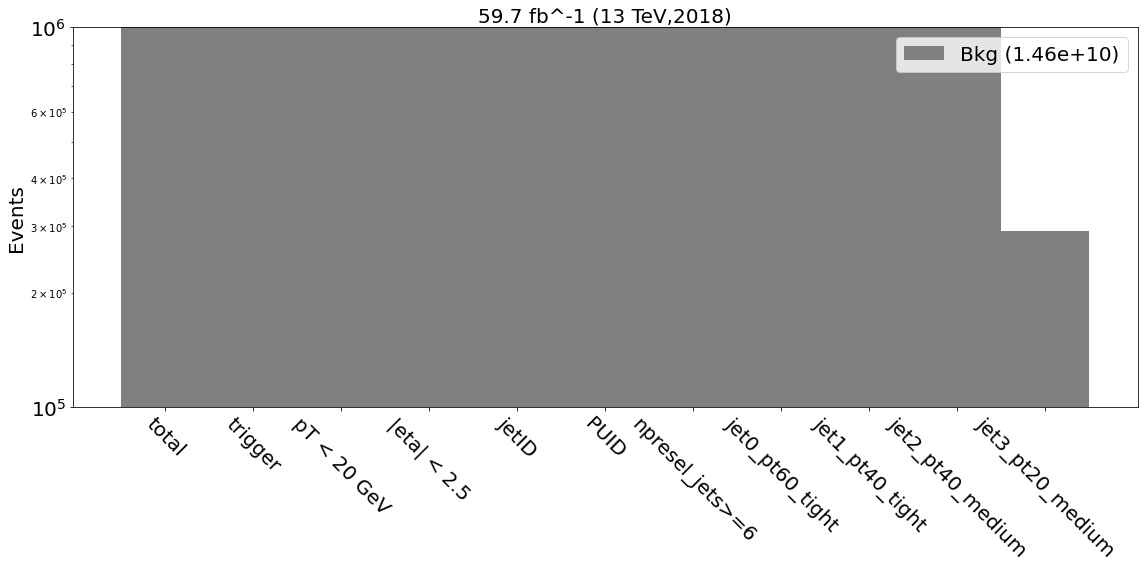

In [65]:
study.cutflow(bkg_tree,log=1)

In [ ]:
study.cutflow(sig_tree,log=1)

[7503.2839598]
7503.283959798995
[ 0  1  2  3  4  5  6  7  8  9 10]


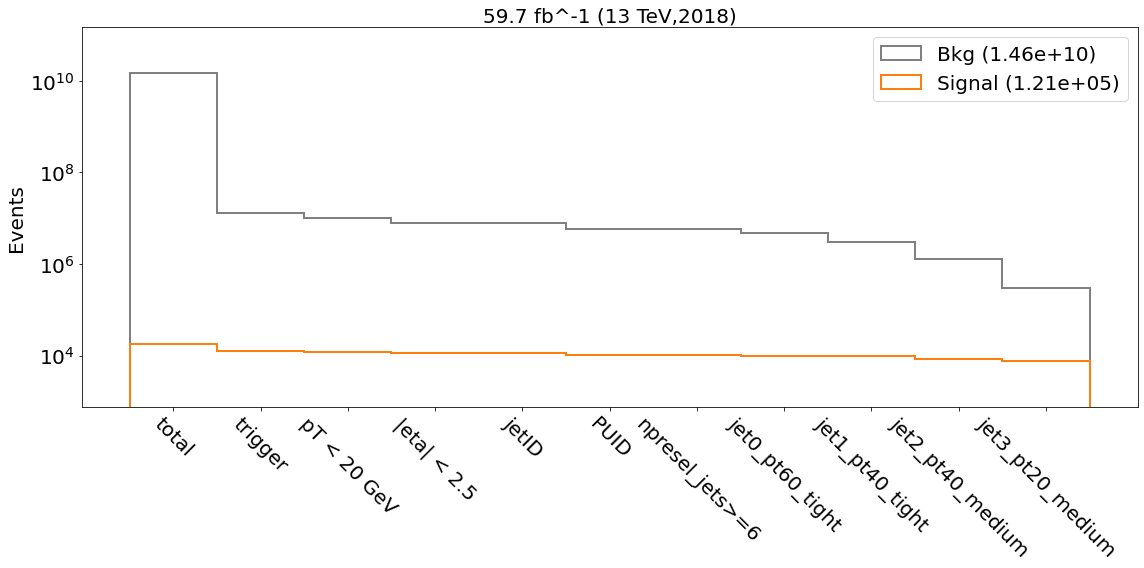

In [6]:
study.cutflow(trees,log=1,saveas='cutflow_signal_bkgd')

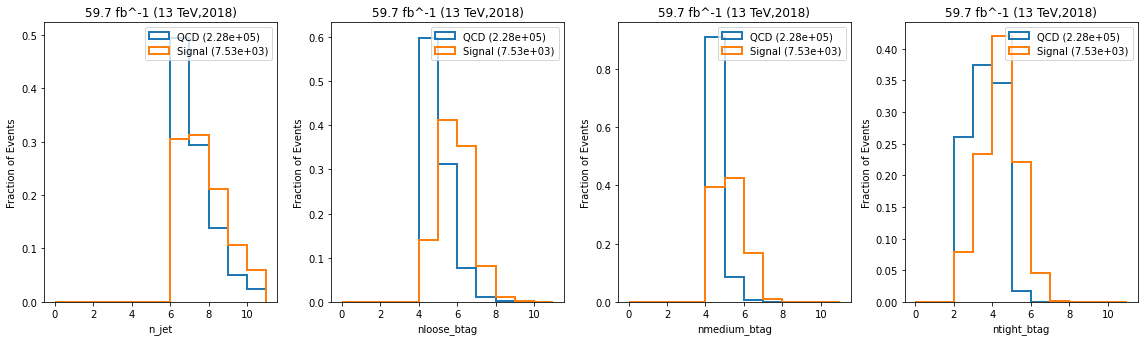

In [9]:
study.njets(trees,density=1)

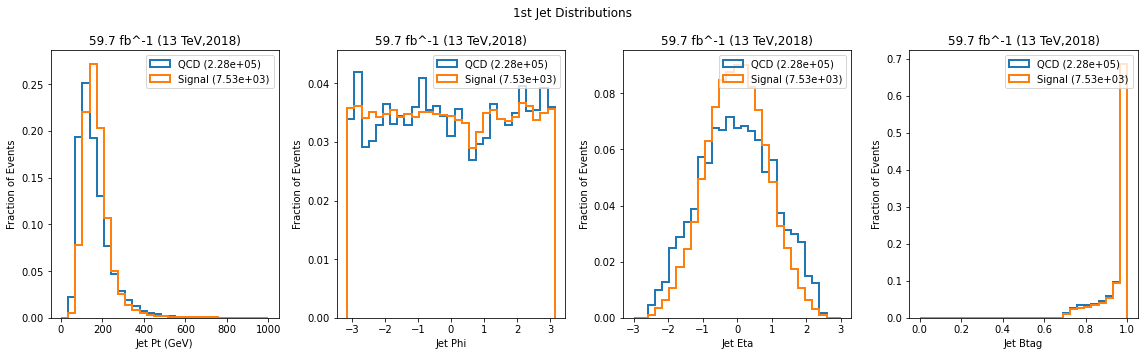

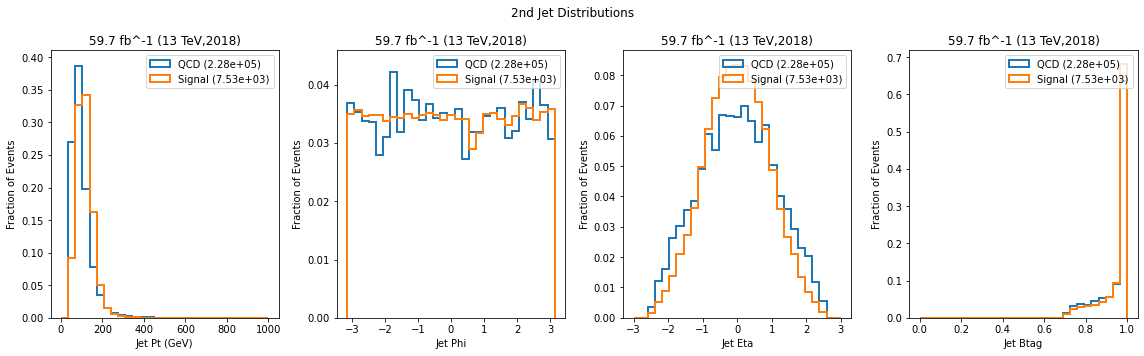

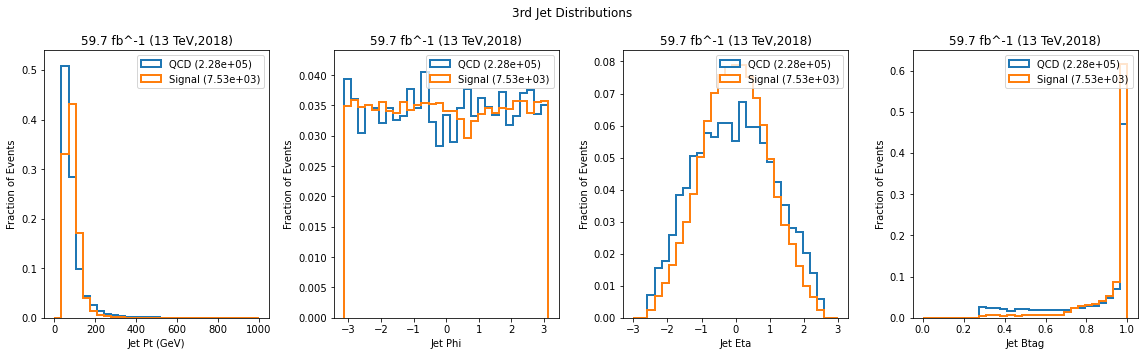

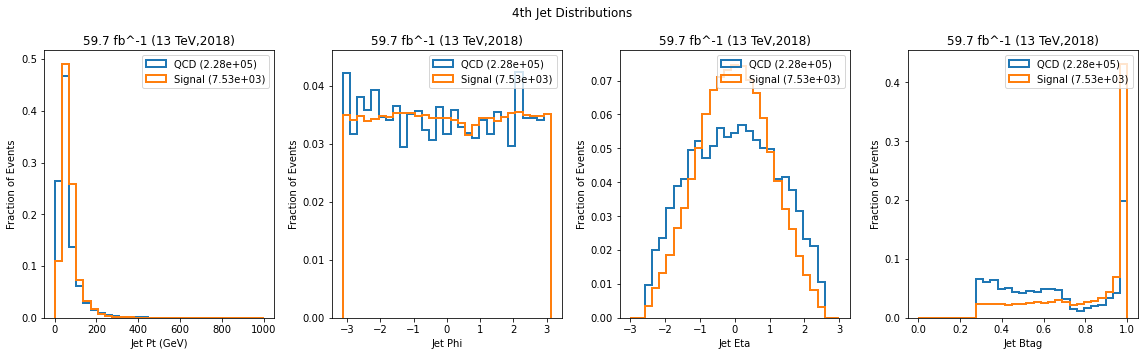

In [6]:
study.ijets(trees,njets=4,density=1)

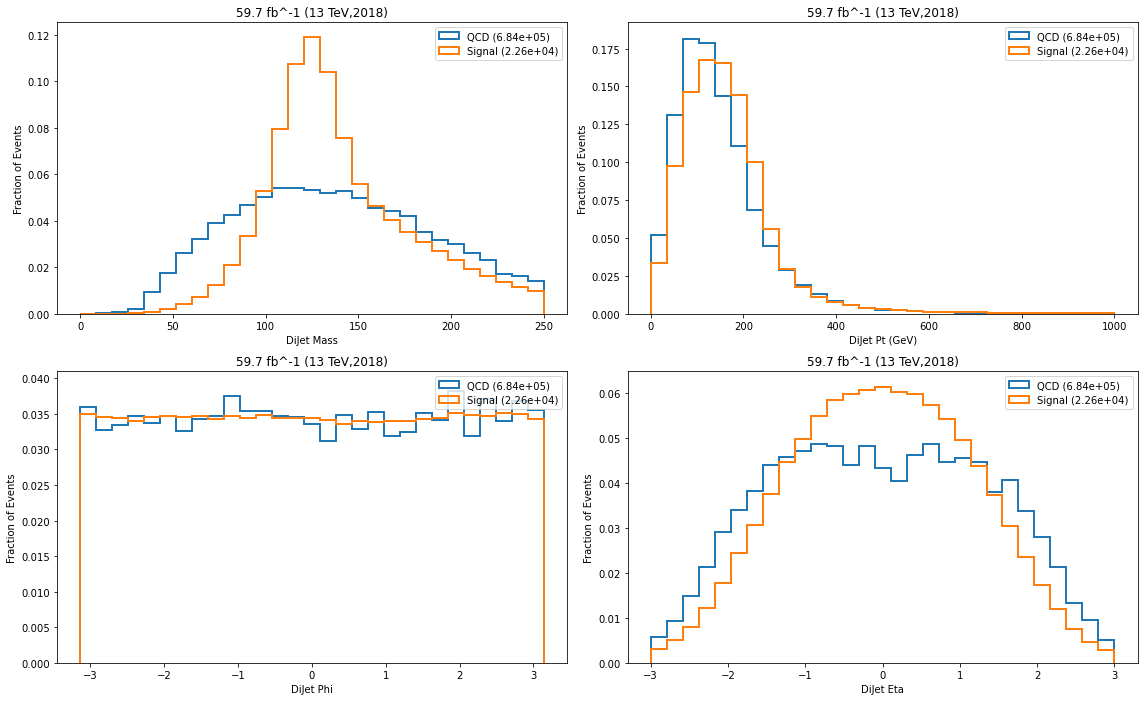

In [7]:
study.higgs(trees,["QCD","Signal"],density=1)